In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 크롤링
from bs4 import BeautifulSoup
from selenium import webdriver
import time, sys

# 시각화 맵
import folium

# Label encoder
from sklearn.preprocessing import LabelEncoder

# dtclf
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()

In [146]:
df_t = sns.load_dataset('titanic')

<AxesSubplot:xlabel='pclass', ylabel='survived'>

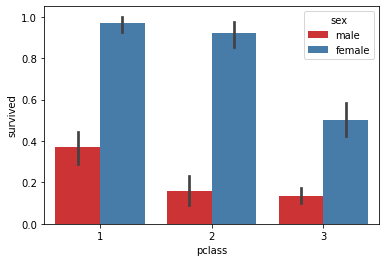

In [147]:
sns.barplot(data=df_t, x='pclass', y='survived',hue='sex', palette='Set1')

In [148]:
df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

In [47]:
# age_new 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

for column in ['sex', 'embarked', 'age_new'] :
    datas = df_t[column].unique()
    for i, d in enumerate(datas) :
        df_t[column].replace(d, i, inplace=True)

In [96]:
from sklearn.preprocessing import LabelEncoder

items = ['TESLA', '삼성', '카카오', '네이버', 'Apple', 'Benz', 'Benz', 'Apple']

In [97]:
lb = LabelEncoder()

In [98]:
# items의 값의 유니크한 값이 오름차순으로 정렬된다.
lb.fit(items)

LabelEncoder()

In [101]:
labels = lb.transform(items)
print(labels)
[2 4 5 3 0 1 1 0]

# 숫자데이터를 문자데이터로 확인이 가능하다.
lb.inverse_transform([5])
# array(['카카오'], dtype='<U5')

[2 4 5 3 0 1 1 0]


array(['카카오'], dtype='<U5')

In [86]:
for i, n in enumerate(lb.classes_) :
    print(i, n)

0 Apple
1 Benz
2 TESLA
3 네이버
4 삼성
5 카카오


In [136]:
items2 = [df_t.sex.unique()]
t_sex_encoder = LabelEncoder()
lb2.fit(items2[0])

for i, d in enumerate(lb2.classes_):
    print(i, d)

0 0
1 1


In [137]:
for i in ['sex', 'embarked'] : 
    encoder = LabelEncoder()
    encoder.fit(df_t[i])
    df_t[i] = encoder.transform(df_t[i])

In [203]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [141]:
df1_sex_encoder = LabelEncoder()
df1_embarked_encoder = LabelEncoder()
df1_agenew_encoder = LabelEncoder()
df1_sex_encoder.fit(df_t['sex'])
df1_embarked_encoder.fit(df_t['embarked'])
df1_agenew_encoder.fit(df_t['age_new'])
df_t['sex'] = df1_sex_encoder.transform(df_t['sex'])
df_t['embarked'] = df1_embarked_encoder.transform(df_t['embarked'])
df_t['age_new'] = df1_agenew_encoder.transform(df_t['age_new'])

In [144]:
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df1_{i}_encoder'].transform(df_t[i])

In [228]:
df_t2 = pd.get_dummies(df_t, prefix=['sex', 'embarked', 'deck'])

In [161]:
df_t2.age.mean()
df_t2.age.var()
df_t2.age.std()

14.526497332334044

<AxesSubplot:xlabel='age'>

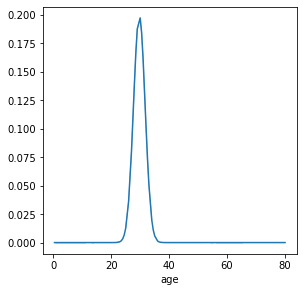

In [197]:
from scipy.stats import norm

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)

sns.lineplot(x='age' ,y=norm.pdf(df_t['age'], loc=df_t['age'].mean(), scale=2), data=df_t2, ax=ax1)

mean: 
survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
sex_female     0.352413
sex_male       0.647587
embarked_C     0.188552
embarked_Q     0.086420
embarked_S     0.722783
deck_A         0.016835
deck_B         0.052750
deck_C         0.066218
deck_D         0.037037
deck_E         0.035915
deck_F         0.014590
deck_G         0.004489
dtype: float64
std : 
survived      1.0
pclass        1.0
age           1.0
sibsp         1.0
parch         1.0
fare          1.0
sex_female    1.0
sex_male      1.0
embarked_C    1.0
embarked_Q    1.0
embarked_S    1.0
deck_A        1.0
deck_B        1.0
deck_C        1.0
deck_D        1.0
deck_E        1.0
deck_F        1.0
deck_G        1.0
dtype: float64


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

ValueError: num must be 1 <= num <= 9, not 10

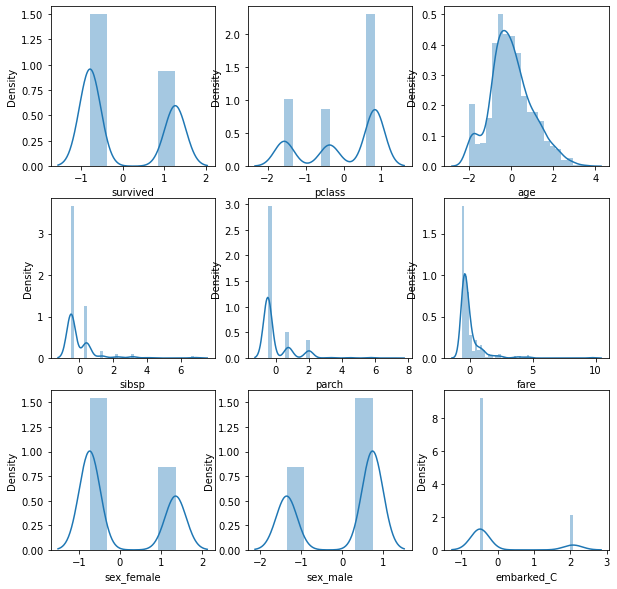

In [194]:
# 분산
df1_fs = (df_t2 - df_t2.mean())/df_t2.std()
print('mean: ')
print(df_t2.mean())
print('std : ')
print(df1_fs.std())
      
fig = plt.figure(figsize=(10, 10))
      
for no, i in enumerate(df_t2.columns):
    globals()[f'ax{no+1}'] = fig.add_subplot(3,3,no+1)
    
    sns.distplot(df1_fs[i], ax=globals()[f'ax{no+1}'])
    
plt.show()

In [211]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_t2)
df_t_scaled = scaler.transform(df_t2)

df_t_scaled = pd.DataFrame(df_t_scaled, columns = df_t2['age'])
print('age의 최솟값')
print(df_t_scaled.min())
print('\n age의 최댓값')
print(df_t_scaled.max())

ValueError: Shape of passed values is (891, 18), indices imply (891, 891)

<AxesSubplot:>

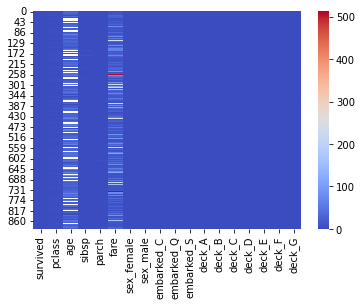

In [226]:
sns.heatmap(df_t2,
           cmap='coolwarm',)

In [229]:
df_t2

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1,0,0,0,0,0,0,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,0,1,0,0,0,0,0
888,0,3,NaN,1,2,23.4500,1,0,0,0,1,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,0,0,1,0,0,0,0


In [316]:
def solution(s) : 
    answer = 'Yes'
    if s['집 소유'] <= 'No' :
        if s['결혼'] != '기혼' :
            if s['연소득'] > 70 and s['연소득'] <= 95 : answer = 'Yes'
            else : answer = "No"
        else : answer = "No"
    else : answer = "No"
    return answer

In [317]:
s = {'연소득' : 200, '결혼' : '미혼', '집 소유' : 'No'}

In [318]:
solution(s)

'No'

In [325]:
def solution_t(s) :
    answer = False
    if s['survived'] == 1 :
        answer = True
    return answer

In [343]:
for i in dt.index :
    print(solution(dt.loc[i]))


No
No
No
No
Yes
No
No
Yes
No
Yes


In [78]:
fin = {'ID': list(range(1, 11)),
        '집소유' : ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
      '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼', '기혼', '이혼', '미혼', '기혼', '미혼'],
       '연소득' : [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
       '채무불이행' : ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']}

df = pd.DataFrame(fin)
df.set_index('ID', inplace=True)

In [4]:
# for column in ['집 소유', '결혼', '채무 불이행'] :
#     datas = df[column].unique()
#     for i, d in enumerate(datas) :
#         df[column].replace(d, i, inplace=True)

In [79]:
# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['집소유', '결혼', '채무불이행']:
    globals()[f'df_{i}_encoder'] = LabelEncoder()
    globals()[f'df_{i}_encoder'].fit(df[i])
    df[i] = globals()[f'df_{i}_encoder'].transform(df[i])

In [80]:
# 머신러닝이 목적으로 할 데이터를 설정
X = df.drop(columns='채무불이행')
y = df['채무불이행']

In [51]:
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()

In [81]:
# fit = 머신러닝의 학습의 
finan_dtclf.fit(X, y)

DecisionTreeClassifier()

In [53]:
!pip install graphviz

In [54]:
from sklearn.tree import export_graphviz
import graphviz

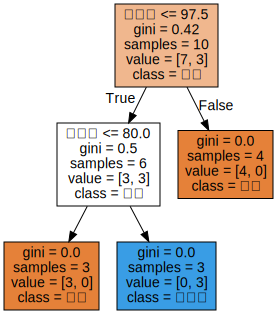

In [82]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=None,
                filled=True,
                leaves_parallel=False,
                impurity=True,
                node_ids=False,
                proportion=False,)

with open('./finance1.dot') as f :
    finance1 = f.read()
graphviz.Source(finance1)

In [83]:
new = ({'ID': list(range(1, 6)),
       '집 소유' : ['No', 'Yes', 'Yes', 'No', 'No'],
      '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼'],
       '연소득(K)' : [55, 80, 110, 95, 300]
      })
new_p = pd.DataFrame(new)
new_p.set_index('ID', inplace=True)

# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['집 소유', '결혼']:
    globals()[f'new_p{i}_encoder'] = LabelEncoder()
    globals()[f'new_p{i}_encoder'].fit(new_p[i])
    new_p[i] = globals()[f'new_p{i}_encoder'].transform(new_p[i])

In [84]:
new_p

,집 소유,결혼,연소득(K)
ID,,,
1,0,1,55
2,1,0,80
3,1,1,110
4,0,0,95
5,0,2,300


In [90]:
# predict() = 예측을 하겠다.
pred_result = finan_dtclf.predict(new_p)
pred_result_2 =  df_채무불이행_encoder.inverse_transform(pred_result)
new_p['채무불이행예측'] = pred_result_2


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 연소득(K)
- 집 소유
- 채무불이행예측
Feature names seen at fit time, yet now missing:
- 연소득
- 집소유

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'No'

In [92]:
new_p

,집 소유,결혼,연소득(K),채무불이행예측
ID,,,,
1,0,1,55,No
2,1,0,80,No
3,1,1,110,No
4,0,0,95,Yes
5,0,2,300,No


In [97]:
df_결혼_encoder.classes_

array(['기혼', '미혼', '이혼'], dtype=object)

In [98]:
df_집소유_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [105]:
for i in ['집 소유', '결혼']:
    new_p[i] = globals()[f'new_p{i}_encoder'].classes_[new_p[i]]
new_p

In [330]:
# 타이타닉 데이터 전처리

df_t = sns.load_dataset('titanic')
df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# 연령의 결측치 해결
age_md = df_t.groupby(['pclass', 'sex']).age.agg(['median'])
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'male'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'female'][0]

# embarked 결측치 해결
df_t.embarked.fillna(df_t.embarked.unique()[0], inplace=True)

# 연령층 별 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

# 불필요 컬럼 제거
df_t.drop(columns=['deck', 'sibsp', 'parch', 'age', 'embarked'], inplace=True)

# df_t.info()
# sex, embarked, age_new 해결해야함

# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'survived', 'age_new']:
    globals()[f'df_t{i}_encoder'] = LabelEncoder()
    globals()[f'df_t{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df_t{i}_encoder'].transform(df_t[i])
    
df_t

,survived,pclass,sex,fare,age_new
0,0,3,1,7.2500,2
1,1,1,0,71.2833,2
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2
...,...,...,...,...,...
886,0,2,1,13.0000,2
887,1,1,0,30.0000,2
888,0,3,0,23.4500,2
889,1,1,1,30.0000,2


In [331]:
# 타이타닉 머신러닝 예측 학습

# 머신러닝이 목적으로 할 데이터를 설정
X = df_t.drop(columns='survived')
y = df_t['survived']

from sklearn.tree import DecisionTreeClassifier
finan_dtclf_2 = DecisionTreeClassifier()

# fit = 머신러닝의 학습의 의미
finan_dtclf_2.fit(X, y)
# 분석-decision tree classification

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(finan_dtclf_2, out_file='finance2.dot', 
                feature_names=X.columns,
                class_names=['생존', '사망'],
                max_depth=5,
                filled=True,
                leaves_parallel=False,
                impurity=True,
                node_ids=False,
                proportion=False,)

with open('./finance2.dot') as f :
    finance2 = f.read()
graphviz.Source(finance2)

# dot_graph의 source 저장
# dot = graphviz.Source(finance2) 
# png로 저장
# dot.render(filename='tree.png') 

'tree.png.pdf'

In [342]:
# 새로운 타이타닉 데이터 전처리 

df_test = pd.read_csv('./test.csv')

# df_test.info()
# Name, Sex, Ticket, Cabin, Embarked 해결 필요

# 연령의 결측치 해결
# fare 결측치 해결
age_md = df_test.groupby(['Pclass', 'Sex']).Age.agg(['median'])
fare_md = df_test.groupby(['Pclass', 'Sex']).Fare.agg(['median'])
for i in ['male', 'female'] : 
    for y in range(1, 4) : 
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Age.isna()), 'Age'] = age_md.loc[{y}, '{i}'][0]"
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Fare.isna()), 'Fare'] = fare_md.loc[{y}, '{i}'][0]"
        

# 결측치가 너무 많은 데이터, 컬럼 삭제
df_test.drop(columns=['Cabin'], inplace=True)

# age_new 생성
df_test.loc[df_test.Age >= 50, "age_new"] = "old"
df_test.loc[(df_test.Age < 50) & (df_test.Age>=10), "age_new"] = "young"
df_test.loc[df_test.Age < 10, "age_new"] = "baby"

# 필요 없는 데이터 제거
df_test.drop(columns=['Name', 'Ticket', 'PassengerId', "SibSp", "Parch", 'Age', 'Embarked'], inplace=True)


# 컬럼 소문자로 변경 
l1 = []
for i in list(df_test.columns):
    l1.append(i.lower())
df_test.set_axis(l1, axis='columns', inplace=True)

# Index(['pclass', 'sex', 'age', 'fare', 'embarked', 'predict survived'], dtype='object')
# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'age_new']:
    globals()[f'df_test{i}_encoder'] = LabelEncoder()
    globals()[f'df_test{i}_encoder'].fit(df_test[i])
    df_test[i] = globals()[f'df_test{i}_encoder'].transform(df_test[i])

df_test[df_test['fare'].isna() == True] 

,pclass,sex,fare,age_new
152,3,1,NaN,1


In [1]:
[# 새로운 타이타닉 데이터 생존 여부 예측
pred_result = finan_dtclf_2.predict(df_test)
pred_result_2 =  df_test_survived_encoder.inverse_transform(pred_result)
df_test['survived'] = pred_result_2]

SyntaxError: invalid syntax (3487590500.py, line 2)

In [336]:
df_test

,pclass,sex,fare,age_new
0,3,1,7.8292,2
1,3,0,7.0000,2
2,2,1,9.6875,1
3,3,1,8.6625,2
4,3,0,12.2875,2
...,...,...,...,...
413,3,1,8.0500,3
414,1,0,108.9000,2
415,3,1,7.2500,2
416,3,1,8.0500,3


In [302]:
# 파일 저장해서 캐글에 올리기.
tit = pd.read_csv('test.csv')
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True)
tit['Survived'] = df_test['survived']
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test.csv')

In [353]:
# 학습 데이터 70%, 테스트 데이터 30%

from sklearn.model_selection import train_test_split

X = df_t.drop('survived', axis=1)
y = df_t.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

# 직접구현
# X_train = df_t.iloc[:round(891 * 0.7), 1:]
# X_test = df_t.iloc[round(891 * 0.3), 1:]
# y_train = df_t.iloc[:round(891 * 0.7), 0]
# y_test = df_t.iloc[round(891 * 0.3), 0]

# np.random.shuffle

In [349]:
len(X_train.index) / (df_t.shape[0] + 1)
# 0.6984304932735426

0.6984304932735426

In [350]:
# train 70%, validation 20%, test 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=12)
# val데이터 셋은 고정된게 아니기 때문에 이 과정을 진행하지 않아도 된다.

len(X_val.index) / (df_t.shape[0] + 1)
# 0.1547085201793722

In [355]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# (801, 4)
# (90, 4)
# (801,)
# (90,)

(801, 4)
(90, 4)
(801,)
(90,)


In [9]:
dt_clf = DecisionTreeClassifier()

In [8]:
dt_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [365]:
# predict이 필요한 이유 : 정답이 없는 경우가 있기 때문.
dt_pred = dt_clf.predict(X_test)

In [367]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)
print('DecisionTree 정확도: %.2f' % accuracy_score(y_test, dt_pred))
# DecisionTree 정확도: 0.81

print('DecisionTree 정확도: %.2f' % dt_clf.score(X_test, y_test))
# DecisionTree 정확도: 0.81

DecisionTree 정확도: 0.81


In [5]:
# 학습 실행

from sklearn.model_selection import KFold

def exe_kfold(clf, folds=5) : 
    
    kFold = KFold(n_splits=5)
    scores=[]
    
    for i, (train_idx, val_idx) in enumerate(kFold.split(X_train)) :
        X_train_k = X_train.iloc[train_idx]
        y_train_k = y_train.iloc[train_idx]
        X_val_k = X_train.iloc[val_idx]
        y_val_k = y_train.iloc[val_idx]    

        dt_clf.fit(X_train_k, y_train_k)
        scores.append(dt_clf.score(X_val_k, y_val_k))
    print(f"{clf} 개별 학습 결과 : ", scores)
    print(f"{clf}평균 학습 결과 : %.2f", np.mean(scores))

# [0.828125, 0.8828125, 0.8515625, 0.8203125, 0.8359375]
# 0.84375

In [403]:
# 전체 학습

scores=[]
for i, (train_idx, val_idx) in enumerate(kFold.split(X)) :
    X_train_k = X.iloc[train_idx]
    y_train_k = y.iloc[train_idx]
    X_val_k = X.iloc[val_idx]
    y_val_k = y.iloc[val_idx]  
    
    dt_clf.fit(X_train_k, y_train_k)
    scores.append(dt_clf.score(X_val_k, y_val_k))
    
print(scores)
print(np.mean(scores))
# [0.7821229050279329, 0.7752808988764045, 0.8370786516853933, 0.8370786516853933, 0.8595505617977528]
# 0.8182223338145753

[0.7821229050279329, 0.7752808988764045, 0.8370786516853933, 0.8370786516853933, 0.8595505617977528]
0.8182223338145753


In [10]:
exe_kfold(dt_clf)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold

In [ ]:
def exe_kfold(clf, folds=5) : 
    
    kFold = KFold(n_splits=5)
    scores=[]
    
    for i, (train_idx, val_idx) in enumerate(kFold.split(X_train)) :
        X_train_k = X_train.iloc[train_idx]
        y_train_k = y_train.iloc[train_idx]
        X_val_k = X_train.iloc[val_idx]
        y_val_k = y_train.iloc[val_idx]    

        dt_clf.fit(X_train_k, y_train_k)
        scores.append(dt_clf.score(X_val_k, y_val_k))
    print(f"{clf} 개별 학습 결과 : ", scores)
    print(f"{clf}평균 학습 결과 : %.2f", np.mean(scores))

In [ ]:
from sklearn.metrics import confusion_matrix

# dummy 예측
confusion_matrix(y, X.predict)

# 모델 예측
confusion_matrix(y, titanic_dtclf.predict(X))